In [3]:
from __future__ import print_function

import time
import init_paths
import skimage.io as skio
import matplotlib.pyplot as plt
import demo
import cv2
import numpy as np
import os
import io
from PIL import Image


In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialize Demo Solver

In [5]:
# Arg: quality and num_per_dim -> tradeoffs between quality and time spent running 
# quality affects dense=False, and num_per_dim affects dense=True
ckpt_path = './ckpt/exif_final/exif_final.ckpt'
exif_demo = demo.Demo(ckpt_path=ckpt_path, use_gpu=1, quality=3.0, num_per_dim=30,nb_threads=10,num_threads=4)

LOADED
ICIIII
Initializing graph on device /gpu:1
INFO:tensorflow:Restoring parameters from ./ckpt/exif_final/exif_final.ckpt
unknown checkpoint string format ./ckpt/exif_final/exif_final.ckpt setting iteration to 0
Succesfully resuming from ./ckpt/exif_final/exif_final.ckpt


In [36]:
exif_demo.bu.n_anchors = 320

In [39]:
path = '../samples/pL1hLZD.jpg'
im1 = cv2.imread(path)

## Run examples
This takes some time be patient :) 

In [42]:
# MeanShift + dense affinities (as described in our paper)
ms_st = time.time()
im1, res1 = exif_demo(path, dense=True) # Upsampled via bilinear upsampling
print('MeanShift run time: %.3f' % (time.time() - ms_st))

RESET_TOOK 0.2513160705566406 s
START
NB patches : 589
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(20000, 4)
(6921, 4)
precomputed analysis time : 0.256885290145874
precomputed analysis time : 0.2691330909729004
precomputed analysis time : 0.5489063262939453
precomputed analysis time : 0.4396209716796875
precomputed analysis time : 0.41329050064086914
precomputed analysis time : 0.3707883358001709
precomputed analysis time : 0.3294045925140381
precomputed analysis time : 0.44230008125305176
precomputed analysis time : 0.5835230350494385
precomputed analysis time : 0.31886959075927734
precomputed analysis time : 0.49957799911499023
precomputed analysis time : 0.4084606170654297
precomputed analysis time : 0.27254462242126465
precomputed analysis time : 0.27137279510498047
precomputed analysis time : 0.27492523193359375
precomputed analysis time : 0.2763819

In [6]:
# DBSCAN + sparse anchors
db_st = time.time()
im2, res2 = exif_demo(path, dense=False) # No upsampling
print('DBSCAN run time: %.3f' % (time.time() - db_st))

START
ENTERED


AttributeError: 'EXIFNet' object has no attribute 'cls_pred'

In [15]:
app = Flask(__name__)
with app.app_context():
    _, img_buffer = cv2.imencode('.jpg', im1)
    response = make_response(img_buffer.tobytes())

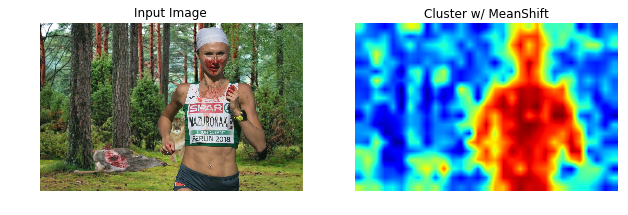

In [58]:
% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')

map_ = (1.0 - res1)*255
map_ = map_.astype(np.uint8)

img = plt.imshow(map_, cmap='jet')
#plt.subplot(1, 3, 3)
#plt.title('Cluster w/ DBSCAN')
#plt.title('Mask')
#plt.axis('off')
#plt.imshow(res2, cmap='jet', vmin=0.0, vmax=1.0)
#plt.imshow(cv2.imread('../dataset_IEEE/pos/c86cb7e7cf51b7b182a6ffa8b253ed2b.mask.png'), cmap='jet', vmin=0.0, vmax=1.0)

plt.show()

In [37]:
buf = io.BytesIO()
plt.imsave(buf,1.0 - res1, cmap='jet', vmin=0.0, vmax=1.0)

In [38]:
open('test_2.jpg','wb').write(buf.getvalue())


665383

## TEST

In [6]:
# MeanShift + dense affinities (as described in our paper)
base_dir = '../selfcrafted/fake_w_metadata/'
base_dir_orig = '../selfcrafted/w_metadata/'
target_file = '../selfcrafted_results_orig/'
if not os.path.isdir(target_file):
    os.mkdir(target_file)
base_dir = base_dir_orig
for img in os.listdir(base_dir):
    ms_st = time.time()
    if not img.endswith('.jpg') or img.startswith('.'):
        continue
    im1, res1 = exif_demo(base_dir+img, dense=True) # Upsampled via bilinear upsampling
    print('MeanShift run time: %.3f' % (time.time() - ms_st))
    plt.subplots(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(cv2.imread(base_dir_orig+img),cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
#    plt.subplot(1, 3, 2)
#    plt.title('Tampered Image')
#    plt.imshow(im1)
#    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Cluster with MeanShift on Original image')
    plt.axis('off')
    plt.imshow(1.0 - res1, cmap='jet', vmin=0.0, vmax=1.0)
    plt.savefig(target_file+img)

True ../selfcrafted/w_metadata/._toyota-tacoma-thule-fixed-position-custom-installation-tk14-tracker-ii-roof-rack-system-parts-dsc-ebay-leer-specs-with-locks-canada-wlocks-weight-capacity-price.jpg
True ../selfcrafted/w_metadata/._bump_rear.jpg
True ../selfcrafted/w_metadata/2825761442_fb30e642f6_o.jpg
START
precomputed_analysis_vote_cls took 33.131805658340454 s
Mean shift took 3.8501474857330322 s
MeanShift run time: 38.176
True ../selfcrafted/w_metadata/._2825761442_fb30e642f6_o.jpg
True ../selfcrafted/w_metadata/._Damaged_pickup.jpg
True ../selfcrafted/w_metadata/Fake_LCD_crack.jpg
START
precomputed_analysis_vote_cls took 33.04558730125427 s
Mean shift took 3.6319541931152344 s
MeanShift run time: 37.138
True ../selfcrafted/w_metadata/31220390051_9e32762c41_o.jpg
START
precomputed_analysis_vote_cls took 33.212093353271484 s
Mean shift took 3.3593063354492188 s
MeanShift run time: 37.153
True ../selfcrafted/w_metadata/._car_burned.jpg
True ../selfcrafted/w_metadata/._phone_back_crac

## Normalized Cuts
While running the dense version, the algorithm produces a dense affinity which can be used in popular spectral clustering methods. The following code runs both the clustering with MeanShift and segmentation with N-Cuts.

In [68]:
start = time.time()
im1 = cv2.imread(path)[:,:,[2,1,0]]
res = exif_demo.run(im1, use_ncuts=True, blue_high=True)
print('TIME ELAPSED: {}'.format(time.time()-start))


START
precomputed_analysis_vote_cls took 29.93727445602417 s
ONLY N_CUT
TIME ELAPSED: 30.493340730667114


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:709: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  warnings.warn("Array is not symmetric, and will be converted "


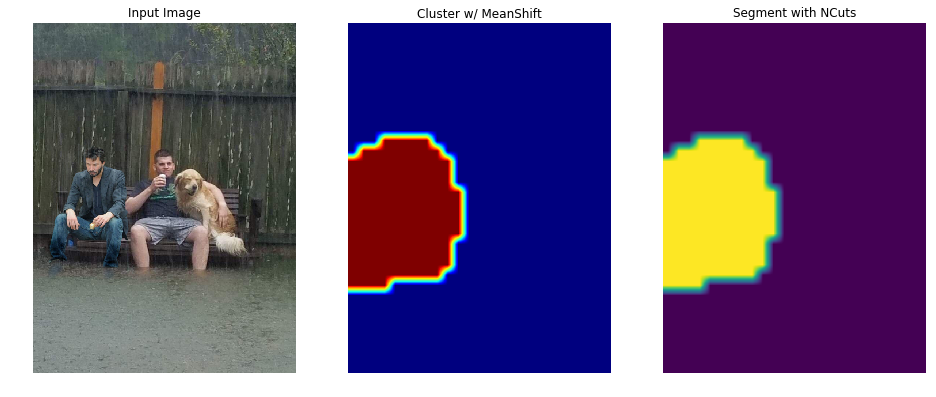

In [69]:


% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(res[0], cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Segment with NCuts')
plt.axis('off')
plt.imshow(res[1], vmin=0.0, vmax=1.0)

plt.show()

In [77]:
cv2.dct(np.float32(im1[:16,:16,0])).shape

(16, 16)

In [8]:
im1 = im1[0:200,0:200,:]

In [22]:
import skimage
a = skimage.util.view_as_windows(im1,(4,4,3))
a[:] = 0

/opt/conda/lib/python3.6/site-packages/skimage/util/shape.py:247: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


In [17]:
((im1.size)*4)*1e-6

0.48

In [23]:
a[[1,2,3,4]] = [1,2,3]

In [26]:
a.shape

(197, 197, 1, 4, 4, 3)

In [30]:
a[1,:,:,:,:,2]

array([[[[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]],


       [[[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]],


       [[[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]],


       ..., 
       [[[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]],


       [[[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]],


       [[[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]]], dtype=uint8)